** 단순선형회귀분석

In [1]:
# 독립변수(설명변수, 피쳐)와 종속변수간의 인과관계 분석 ==> 회귀계수 ( 독립변수 --> 종속변수)
# 설명이나 예측에 활용
# 단순회귀 : 독립변수가 1개 
# 단순회귀 가정 : 선형성

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 판다스 부분에서 했었던 데이터 불러오기
# csv 파일 : crime_list.csv

crime_list = pd.read_csv("crime_list.csv")

crime_list

,날짜,ID,나이,성별,소득,범죄건수
0,2022-11-24,1,71,여성,141440,5
1,2022-02-27,2,67,남성,122769,4
2,2022-01-13,3,67,남성,122908,2
3,2022-05-21,4,21,여성,79638,7
4,2022-05-06,5,32,남성,57388,8
...,...,...,...,...,...,...
95,2022-12-19,96,29,남성,65745,5
96,2022-10-13,97,50,여성,135456,4
97,2022-04-23,98,76,남성,29016,3
98,2022-12-17,99,24,여성,135247,3


In [4]:
crime_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      100 non-null    object
 1   ID      100 non-null    int64 
 2   나이      100 non-null    int64 
 3   성별      100 non-null    object
 4   소득      100 non-null    int64 
 5   범죄건수    100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


 * 단순회귀분석

*Statsmodel 라이브러리

*Sklearn 라이브러리

*Scipy 라이브러리

# Statsmodel 라이브러리
https://www.statsmodels.org/stable/index.html

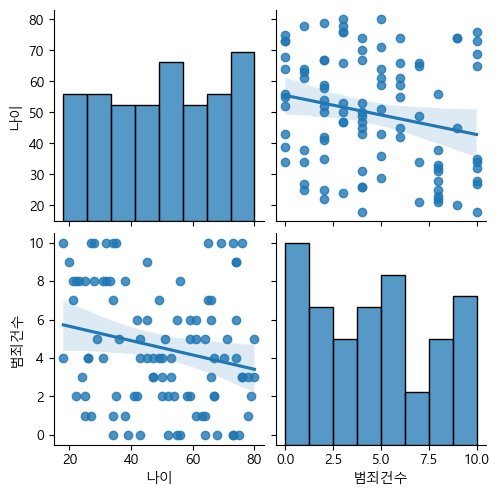

In [5]:
# 분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
# 단순회귀분석을 위해 나이와 범죄건수에 대한 단순회귀분석 모델 구현
sub = crime_list[["나이","범죄건수"]]

# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()

In [6]:
# 필요한 라이브러리

import statsmodels.api as sm

# target 종속변수 : 범죄건수
# feature 독립변수 : 나이

target = crime_list['범죄건수']
feature = crime_list['나이']

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.

feature_add = sm.add_constant(feature, has_constant='add')

# 상수항 더한 것 확인
# feature_add

In [7]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   범죄건수   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.836
Date:                Thu, 03 Aug 2023   Prob (F-statistic):             0.0302
Time:                        13:53:08   Log-Likelihood:                -253.75
No. Observations:                 100   AIC:                             511.5
Df Residuals:                      98   BIC:                             516.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3965      0.899      7.115      0.000       4.612       8.181
나이            -0.0373      0.017     -2.199      0.030      -0.071      -0.004
==============================================================================
Omnibus:                       10.378   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.613
Skew:                           0.274   Prob(JB):                       0.0996
Kurtosis:                       2.102   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R-squared 결정계수 구하기

R^2 = SSR/SST = 1 - (SSE/SST)

In [8]:
# y_hat 도출
target_pred1 = fitted_model.predict()

# SST(편차의 제곱, 총변동), SSE(편차와 잔차의 차이 제곱 : 회귀식으로 설명가능한 변동), SSR(잔차의 제곱 : 회귀식으로 설명하지 못하는 변동)
SST = sum((target - target.mean()) ** 2)
SSE = sum((target_pred1 - target.mean()) ** 2)
SSR = sum((fitted_model.resid) ** 2)

r_squared = (1 - (SSE/SST))

print(f'매서드로 구한 결정계수 R-squared : {fitted_model.rsquared : .5f}')
print(f'직접 구한 결정계수 R-squared : {r_squared : .5f}')

매서드로 구한 결정계수 R-squared :  0.04703
직접 구한 결정계수 R-squared :  0.95297


In [9]:
# 참고 (위와 동일한 값으로 구해진다.)
sst = fitted_model.centered_tss
sse = fitted_model.ess
ssr = fitted_model.ssr

print(f'직접 구한 결정계수 R-squared : {(1 - (ssr/sst)) : .5f}')

직접 구한 결정계수 R-squared :  0.04703


In [10]:
# 참고 (상관계수의 제곱도 결정계수의 값이 나온다) 
# 하지만, 정말 극도로 예측에 실패한 경우, 결정계수는 음이 나올 수도 있다. 이를대면, SSR > SST로 도출되어 1-(SSR/SST)가 음이되는 경우이다.
# 이 경우, 상관계수의 제곱은 항상 양수가 되기에 완전히 같다고 일반화할 수는 없다. (sklearn같은 인공지능 라이브러리의 경우, 상관계수와 결정계수를 명확히 구분하고 있음) 
from scipy import stats

print(f'feature, target의 상관계수 : {stats.pearsonr(feature, target)[0] : .5f}')
print(f'feature, target의 상관계수의 제곱(= R-squared) : {(stats.pearsonr(feature, target)[0]) ** 2 : .5f}')

feature, target의 상관계수 : -0.21686
feature, target의 상관계수의 제곱(= R-squared) :  0.04703


## Adjusted R-squared 조정된 결정계수 구하기

adf R^2 = 1 - (SSR / (n - k - 1)) / (SST / (n - 1))

- n : observation 개수
- k : feature 개수

In [11]:
n = fitted_model.nobs
k = 1

adj_r_squared = 1 - (SSR / (n - k - 1)) / (SST / (n - 1)) 

print(f'매서드로 구한 조정된 결정계수 Adj R-squared : {fitted_model.rsquared_adj : .5f}')
print(f'직접 구한 조정된 결정계수 Adj R-squared : {adj_r_squared : .5f}')

매서드로 구한 조정된 결정계수 Adj R-squared :  0.03731
직접 구한 조정된 결정계수 Adj R-squared :  0.03731


## 회귀계수, 표준오차, t-value


In [12]:
# 회귀계수
y = target - target.mean()
x = feature - feature.mean()

beta = sum(x * y) / sum(x **2)

print(f'매서드로 구한 회귀계수 coef \u03B2 : {fitted_model.params[1] : .5f}')
print(f'직접 구한 회귀계수 coef \u03B2 : { beta : .5f}')

매서드로 구한 회귀계수 coef β : -0.03729
직접 구한 회귀계수 coef β : -0.03729


In [13]:
# 참고 (회귀계수와 상관계수의 관계)

print(f'feature, target의 상관계수 : {stats.pearsonr(feature, target)[0] : .5f}')
print(f'상관계수 : {beta * ((sum(x ** 2) / sum(y ** 2)) ** 0.5) : .5f}')

feature, target의 상관계수 : -0.21686
상관계수 : -0.21686


In [15]:
# 회귀계수의 표준편차
var_error = sum((fitted_model.resid) ** 2) / fitted_model.df_resid
deviation_x = sum((feature - feature.mean()) ** 2)   

std_beta = (var_error/deviation_x) ** 0.5

print(f'매서드로 구한 회귀계수의 표준편차 se(\u03B2) : {fitted_model.cov_params()["나이"][1] ** 0.5 : .5f}')
print(f'직접 구한 회귀계수의 표준편차 se(\u03B2) : { std_beta : .5f}')

매서드로 구한 회귀계수의 표준편차 se(β) :  0.01695
직접 구한 회귀계수의 표준편차 se(β) :  0.01695


In [16]:
# 회귀계수의 t값
t_beta = beta/std_beta

print(f'매서드로 구한 회귀계수(\u03B2)의 t값 : {fitted_model.tvalues[1] : .5f}')
print(f'직접 구한 회귀계수(\u03B2)의 t값 : { t_beta : .5f}')

매서드로 구한 회귀계수(β)의 t값 : -2.19918
직접 구한 회귀계수(β)의 t값 : -2.19918


## 기각역 p-value 시각화

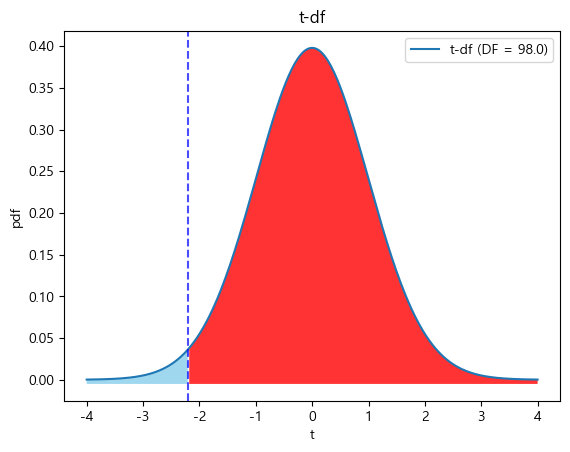

In [17]:
# 라이브러리 호출
import math
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-4, 4, 300)

# 자유도 설정 
DF = fitted_model.nobs - 2
y = (math.gamma((DF+1) / 2) / (math.gamma(DF / 2) * math.sqrt(math.pi * DF))) * (1 + t ** 2 / DF) ** (-(DF + 1) / 2)

plt.plot(t, y)                       
plt.xlabel("t")                    
plt.ylabel("pdf")                      
plt.title("t-df")
plt.legend([f"t-df (DF = {DF})"])
plt.axvline(t_beta, linestyle='--', color='blue', alpha=.7)
plt.fill_between(t, -.005, y, where=(t >= -5) & (t <= t_beta), facecolor='skyblue', alpha=.8,)  # 기각역이 좀 더 명확히 표시되기 위해 실제 크기보다 조금 더 키움
plt.fill_between(t, -.005, y, where=(t >= t_beta), facecolor='red', alpha=.8,)
plt.show()


## 회귀식 시각화

결정계수 R-squared :  0.04703
constant coef(계수)에 대한 p 값 :  0.00000
feature coef(계수)에 대한 p 값 :  0.03022
잔차의 제곱합 MSE :  9.55732


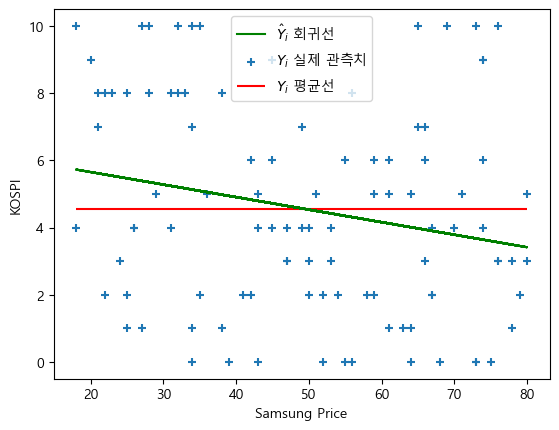

In [18]:
# 통계치 출력 
print(f'결정계수 R-squared : {fitted_model.rsquared : .5f}')
print(f'constant coef(계수)에 대한 p 값 : {fitted_model.pvalues[0] : .5f}')
print(f'feature coef(계수)에 대한 p 값 : {fitted_model.pvalues[1] : .5f}')
print(f'잔차의 제곱합 MSE : {fitted_model.mse_resid : .5f}')

# 회귀선 도출
target_pred1 = fitted_model.predict()

plt.scatter(feature, target, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(feature, target_pred1, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.hlines(target.mean(), feature.min(), feature.max(), color = 'r', label='$Y_i$ 평균선')
plt.legend()
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.show()

# Sklearn 라이브러리
https://scikit-learn.org/stable/

In [19]:
# sklearn을 활용한 선형회귀선 도출
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(feature_add, target)

target_pred2 = model2.predict(feature_add)


결정계수 R-squared :  0.04703
constant coef(계수):  6.39651
feature coef(계수) : -0.03729


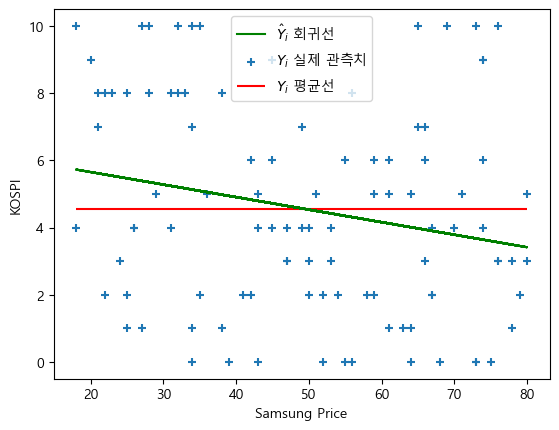

In [20]:
print(f'결정계수 R-squared : {model2.score(feature_add, target) : .5f}')
print(f'constant coef(계수): {model2.intercept_ : .5f}')
print(f'feature coef(계수) : {model2.coef_[1] : .5f}')

# 시각화
plt.scatter(feature, target, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(feature, target_pred2, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.hlines(target.mean(), feature.min(), feature.max(), color = 'r', label='$Y_i$ 평균선')
plt.legend()
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.show()

# Scipy 라이브러리

https://scipy.org/

In [21]:
from scipy.stats import linregress

model = linregress(feature, target)

print(f"R-squared : {model.rvalue ** 2 : .5f}")
print(f'constant coef(계수) : {model.intercept : .5f}')
print(f'feature coef(계수) : {model.slope : .5f}')
print(f'feature coef(계수)의 p-value : {model.pvalue : .5f}')

R-squared :  0.04703
constant coef(계수) :  6.39651
feature coef(계수) : -0.03729
feature coef(계수)의 p-value :  0.03022


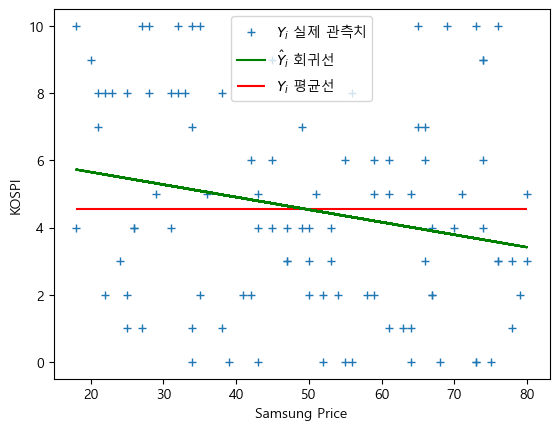

In [22]:
# 시각화
plt.plot(feature, target, '+', label='$Y_i$ 실제 관측치')
plt.plot(feature, model.intercept + model.slope * feature, 'g', label='$\hat{Y}_i$ 회귀선')
plt.hlines(target.mean(), feature.min(), feature.max(), color = 'r', label='$Y_i$ 평균선')
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.legend()
plt.show()